In [1]:
# handle imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# load data
news_data2 = pd.read_csv('sentiment_news_data.csv')

In [3]:
# for empty strings replace with NaN
news_data2 = news_data2.fillna('')

In [4]:
test = True

# list to store all entries
all_entries = []

# loop and add entry/entries to the list
#for col in [f'Top{i}' for i in range(1, 26)]:
for i in range(1, 26):
    # get top 1 to 25
    col  = f'Top{i}'
    col2 = f'Sen_Top{i}'
    col3 = f'Date'
    col_data = news_data2[col]
    col_data2 = news_data2[col2]
    col_data3 = news_data2[col3]
    #for item in col_data:
    for j in range(len(col_data)):
        #all_entries.append([item]) 
        #all_entries.append([item, col_data2])
        all_entries.append([col_data[j], col_data2[j], col_data3[j]])


if test:
    print(len(all_entries))
    print(all_entries[0][0])
    print(all_entries[0][1])
    print(all_entries[1][0])
    print(all_entries[1][1])

46475
north korea open sky south korean medium report
0.0
got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress
-0.3


In [8]:
# reuse of HW, W3S1 w/ mod

## Jaccard similarity between lists <a> and <b>
def jaccard(a,b):
    sa = set(a)
    sb = set(b)

    # adding in this part to avoid the 0 errors
    if len(sa.union(sb)) == 0:
        return 0

    return len(sa.intersection(sb))/len(sa.union(sb))

# Utility function to print the shape of an array of arrays
def printshape(lx):
    print('shape: '+str(len(lx))+' x '+str(len(lx[0])))

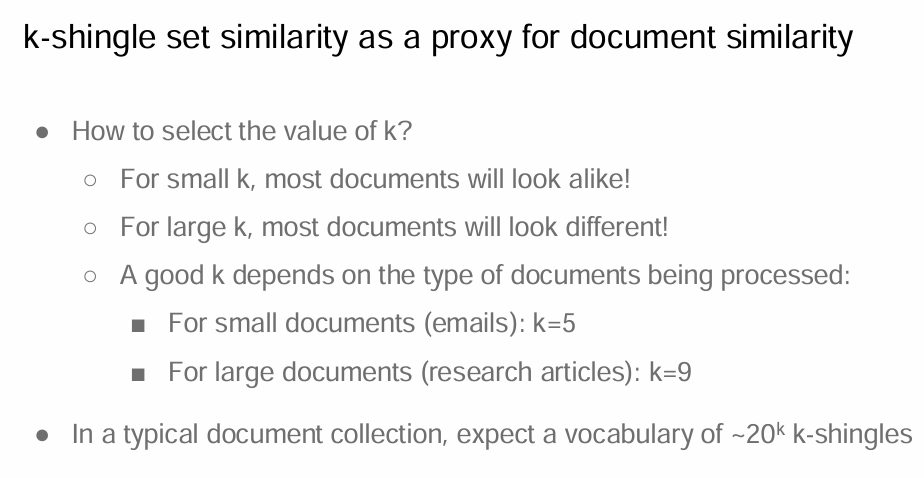

In [90]:
# reuse of HW, W3S1 w/ mod

# Extract k-shingles
k = 5
all_entries2 = [entry[0] for entry in all_entries]
shingles = [[item[n:n+k] for n in range(len(item)-k+1)] for item in all_entries2]
print('length: '+str(len(shingles)))
print('shingles[0]: '+str(shingles[0]))

length: 46475
shingles[0]: ['north', 'orth ', 'rth k', 'th ko', 'h kor', ' kore', 'korea', 'orea ', 'rea o', 'ea op', 'a ope', ' open', 'open ', 'pen s', 'en sk', 'n sky', ' sky ', 'sky s', 'ky so', 'y sou', ' sout', 'south', 'outh ', 'uth k', 'th ko', 'h kor', ' kore', 'korea', 'orean', 'rean ', 'ean m', 'an me', 'n med', ' medi', 'mediu', 'edium', 'dium ', 'ium r', 'um re', 'm rep', ' repo', 'repor', 'eport']


In [92]:
random.seed(2)

# Data too large need to take a 15% random sample
shingles15Percent = random.sample(shingles, int(len(shingles) * 0.15))
ndocs = len(shingles15Percent)
len(shingles15Percent)

6971

In [94]:
# reuse of HW, W3S1 w/ mod
# Compute actual jaccard similarities among all pairs of data samples
similarities = []

for k in range(ndocs):
    for n in range(k+1,ndocs):
        jsim = jaccard(shingles15Percent[k],shingles15Percent[n])
        similarities.append({'items':str(k)+':'+str(n),'jaccard':jsim})
        
similarities = pd.DataFrame(similarities)
similarities.shape

(24293935, 2)

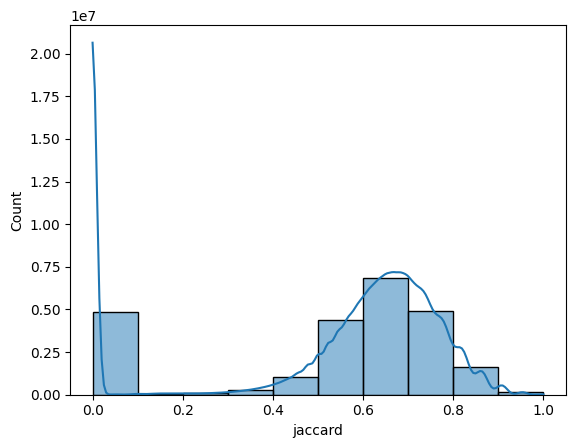

In [69]:
# Displays the histogram of Jaccard similarities
# 1-shingle
hist = sns.histplot(similarities['jaccard'],bins=10,kde=True)

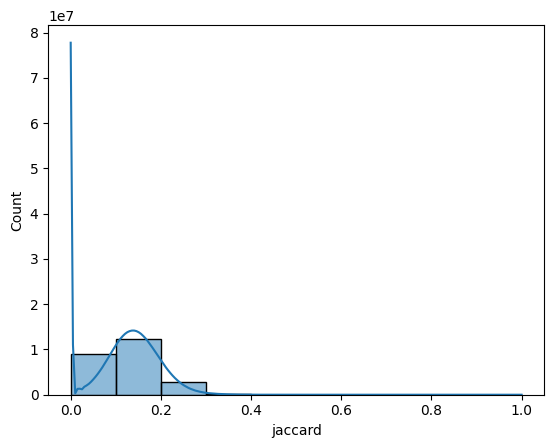

In [79]:
# Displays the histogram of Jaccard similarities
# 2-shingle
hist = sns.histplot(similarities['jaccard'],bins=10,kde=True)

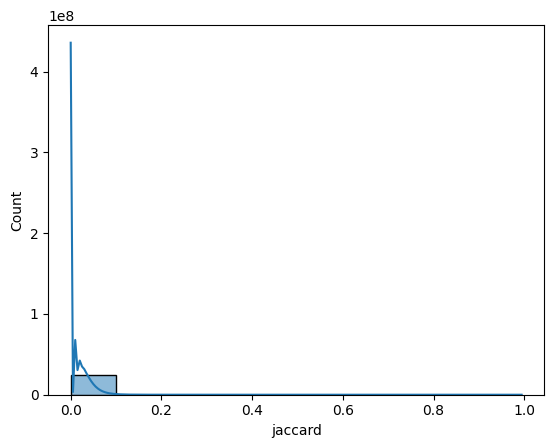

In [87]:
# Displays the histogram of Jaccard similarities
# 3-shingle
hist = sns.histplot(similarities['jaccard'],bins=10,kde=True)

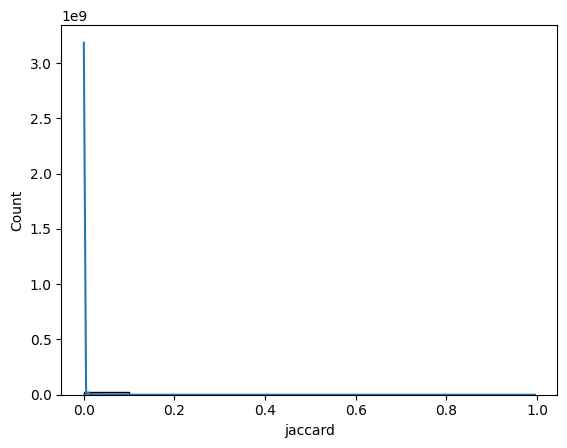

In [95]:
# Displays the histogram of Jaccard similarities
# 5-shingle
hist = sns.histplot(similarities['jaccard'],bins=10,kde=True)

In [ ]:
shingles2 = [[item[n:n+k] for n in range(len(item)-k+1)] for item in ["China Bought Russia"]]
print('shingles2: '+str(shingles2))

In [ ]:
# reuse of HW, W3S1 w/ mod

# compute actual jaccard similarities among all pairs of data samples

all_len = len(shingles)
one_len = len(["China Bought Russia"])

df = pd.DataFrame(columns=['items', 'jaccard'])
df.to_csv('jac_sim.csv', mode='w', header=True, index=False)

sim  = []

for k in range(len(shingles)):
    for m in range(len(shingles2)):
        jsim = jaccard(shingles[k], shingles2[m])

        sim.append([k, jsim])
        with open('jac_sim.csv', mode='a', newline='') as file:
            df = pd.DataFrame([{'items': k, 'jaccard': jsim}])
            df.to_csv(file, header=False, index=False)

In [ ]:
#  import 
from textblob import TextBlob

# function for sentiment using textblob
def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return None

In [ ]:
# function jac sim
# input(s)
#  - main   : array with multiple strings
#  - query  : array with 1 string
#  - k      : int
#  - res    : int
# return(s)
#  - array (size of res) [index, jaccard score] (from highest to lowest score)

# reuse of HW, W3S1 w/ mod
# compute actual jaccard similarities among all pairs of data samples

def jac_sim(main, query, k, res):
    out_file = 'jac_sim.csv'
    sim   = []

    # create shingles
    main2 = [entry[0] for entry in main]
    shingles  = [[item[n:n+k] for n in range(len(item)-k+1)] for item in main2]
    shingles2 = [[item[n:n+k] for n in range(len(item)-k+1)] for item in query]

    # get sentiment of query
    sen = [get_sentiment(text) for text in query]

    #print(sen)

    # create dataframe to output 
    df = pd.DataFrame(columns=['items', 'jaccard'])
    df.to_csv(out_file, mode='w', header=True, index=False)

    # loop through shingles and compare
    for k in range(len(shingles)):
        for m in range(len(shingles2)):
            jsim = jaccard(shingles[k], shingles2[m])
            # append index and score
            sim.append([k, jsim, main[k][1]])
            # also save index and score to output file
            with open(out_file, mode='a', newline='') as file:
                df = pd.DataFrame([{'items': k, 'jaccard': jsim}])
                df.to_csv(file, header=False, index=False)
    
    # sort by jaccard scores (highest ascending)
    sim = sorted(sim, key=lambda x: x[1], reverse=True)[0:res]

    # sort by closest sentiment score
    sim = sorted(sim, key=lambda x: abs(x[1] - sen[0]))

    # return back sorted list but up to resolution desired size
    #return sim[0:res]
    return sim

In [ ]:
ran = 10
k   = 5

jac_ret = jac_sim(all_entries, ["China Bought Russia BAD"], k, ran)
print(jac_ret)

for i in range(ran):
    print(all_entries[jac_ret[i][0]])

In [ ]:
ran = 10
k   = 5

jac_ret = jac_sim(all_entries, ["China Bought Russia"], k, ran)
print(jac_ret)

for i in range(ran):
    print(all_entries[jac_ret[i][0]])

In [ ]:
ran = 10
k   = 5

jac_ret = jac_sim(all_entries, ["China Bought Russia Good"], k, ran)
print(jac_ret)

for i in range(ran):
    print(all_entries[jac_ret[i][0]])